<h1>POISSON'S EQUATION</h1>
<h2>Assignment 2</h2>

<p>Index No: 3503622 <br> Student ID: 20899239</p>

Converged in 33 iterations


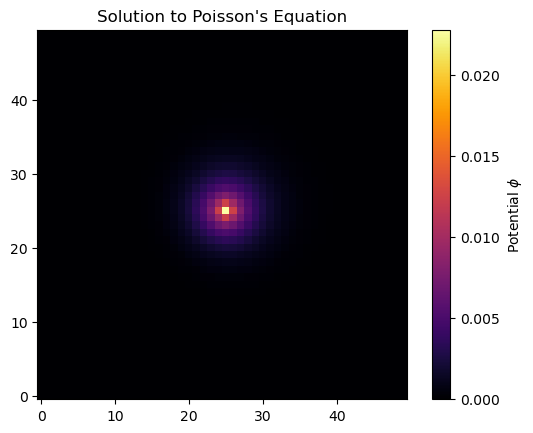

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid parameters
N = 50  # Number of grid points
L = 1.0  # Length of domain
h = L / (N - 1)  # Grid spacing

# Define source term (rho)
rho = np.zeros((N, N))
rho[N//2, N//2] = -100  # Point charge at the center

# Initialize potential field
phi = np.zeros((N, N))

# Set boundary conditions (Dirichlet: phi = 0 at boundaries)
phi[0, :] = 0
phi[-1, :] = 0
phi[:, 0] = 0
phi[:, -1] = 0

# Iterative solver (Gauss-Seidel method)
tolerance = 1e-4
max_iterations = 10000
for iteration in range(max_iterations):
    phi_old = phi.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            phi[i, j] = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] - h**2 * rho[i, j])

    # Check convergence
    error = np.max(np.abs(phi - phi_old))
    if error < tolerance:
        print(f"Converged in {iteration} iterations")
        break

# Plot the results
plt.imshow(phi, cmap='inferno', origin='lower')
plt.colorbar(label=r'Potential $\phi$')
plt.title("Solution to Poisson's Equation")
plt.show()
